<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data-into-list" data-toc-modified-id="Load-data-into-list-1">Load data into list</a></span></li><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-2">Plot data</a></span></li><li><span><a href="#TSP-Heuristic-Solution-Nearest-Neighbor" data-toc-modified-id="TSP-Heuristic-Solution-Nearest-Neighbor-3">TSP Heuristic Solution Nearest Neighbor</a></span></li></ul></div>

In this assignment we will revisit an old friend, the traveling salesman problem (TSP). This week you will implement a heuristic for the TSP, rather than an exact algorithm, and as a result will be able to handle much larger problem sizes. Here is a data file describing a TSP instance (original source: http://www.math.uwaterloo.ca/tsp/world/bm33708.tsp).

nn.txt
The first line indicates the number of cities. Each city is a point in the plane, and each subsequent line indicates the x- and y-coordinates of a single city.

The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations (x,y)(x,y) and (z,w)(z,w) have distance \sqrt{(x-z)^2 + (y-w)^2} between them.

You should implement the nearest neighbor heuristic:

Start the tour at the first city.
Repeatedly visit the closest city that the tour hasn't visited yet. In case of a tie, go to the closest city with the lowest index. For example, if both the third and fifth cities have the same distance from the first city (and are closer than any other city), then the tour should begin by going from the first city to the third city.
Once every city has been visited exactly once, return to the first city to complete the tour.
In the box below, enter the cost of the traveling salesman tour computed by the nearest neighbor heuristic for this instance, rounded down to the nearest integer.

[Hint: when constructing the tour, you might find it simpler to work with squared Euclidean distances (i.e., the formula above but without the square root) than Euclidean distances. But don't forget to report the length of the tour in terms of standard Euclidean distance.]


## Load data into list

In [1]:
import numpy as np
import time
import math
import sys
from collections import defaultdict
import matplotlib.pyplot as plt
from itertools import combinations 


# load data and convert to int
def read_data(filename):
    f = open(filename, 'r')
    # f.readline()
    ls = f.readline().split()
    data = []
    while ls:
        data.append([float(i) for i in ls])
        ls = f.readline().split()
    f.close()
    return data

filename = 'nn.txt'
data = read_data(filename)
n = data[0][0]
data[:6]

[[33708.0],
 [1.0, 9983.3333, 98550.0],
 [2.0, 10000.0, 98533.3333],
 [3.0, 10000.0, 98550.0],
 [4.0, 10000.0, 98566.6667],
 [5.0, 10016.6667, 98516.6667]]

## Plot data

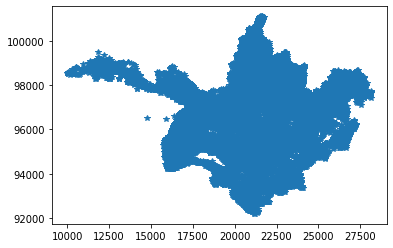

In [2]:
x = [d[1] for d in data[1:]]
y = [d[2] for d in data[1:]]

plt.plot(x, y, '*')

## TSP Heuristic Solution Nearest Neighbor
Let path = [1], visited = {1}, n is the total number of cities   <br>
Base case A[S,1] = 0 if S={1} else infinity <br>
while len(path) < n: <br>
&emsp; calculate distance of all the points not in visited to the last point in path[-1] <br>
&emsp; add the index of the shortest distance to the path and visited  <br>

let tour = 0 <br>
for i from 1 to n: <br>
&emsp; tour += distance(path[i-1], path[i] <br>
tour += distance(path[n], path[0])

for the lagest set S calcuate the minimum of A[S,j] + C_j1 for j from 2 to n

In [3]:
n = int(data[0][0])
path = [0]  # starting from the first city
unvisited = {i for i in range(1, n)}
tour = 0
points = data[1:]

def distance(k, j):
    return math.sqrt((points[k][2]-points[j][2])**2 + (points[k][1]-points[j][1])**2)

def distance2(k, j):
    return (points[k][2]-points[j][2])**2 + (points[k][1]-points[j][1])**2

while len(path) < n:
#     print(len(path))
    nearest = (float('inf'), float('inf'))
    for i in unvisited:
        dist = distance2(path[-1], i)
        nearest = min(nearest, (dist, i))
    path.append(nearest[1])
    unvisited.remove(nearest[1])
    tour += nearest[0]

path[:20]

[0, 2, 1, 4, 5, 6, 8, 10, 9, 11, 12, 7, 3, 14, 13, 16, 15, 17, 18, 20]

In [4]:
# calculate the total distance of the tour
def total_dist(path):
    tour = distance(path[n-1], path[0])
    for i in range(1, n):
        tour += distance(path[i], path[i-1])
    
    return tour

total_dist(path)

1203406.501270884

In [5]:
## Faster alogrithm. sort points by x axis 
## when delta x is larger than the minimum distance break the for loop


n = int(data[0][0])
path = [0]  # starting from the first city
points = data[1:]
ordered = sorted([(p[1], int(p[0])-1) for p in points])
ordered_idx = [e[1] for e in ordered]
visited = {0}
ordered[:5]

while len(path) < n:
#     print(len(path))
    
    nearest = (float('inf'), float('inf'))
    
    for i in ordered_idx:
        if i not in visited:
            if abs(points[i][1] - points[path[-1]][1]) > math.sqrt(nearest[0]):
                break
            dist = distance2(path[-1], i)
            nearest = min(nearest, (dist, i))
#     print(i)       
    path.append(nearest[1])
    visited.add(nearest[1])

print(total_dist(path))
path[:20]

1203406.501270884


[0, 2, 1, 4, 5, 6, 8, 10, 9, 11, 12, 7, 3, 14, 13, 16, 15, 17, 18, 20]

In [6]:
## Faster alogrithm. divide pints into 2-D grids, 
## for each point only check its distance to the points that are in the nearest grids